In [1]:
# 1st Part

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [3]:
students = pd.read_csv("datasets_74977_169835_StudentsPerformance.csv")

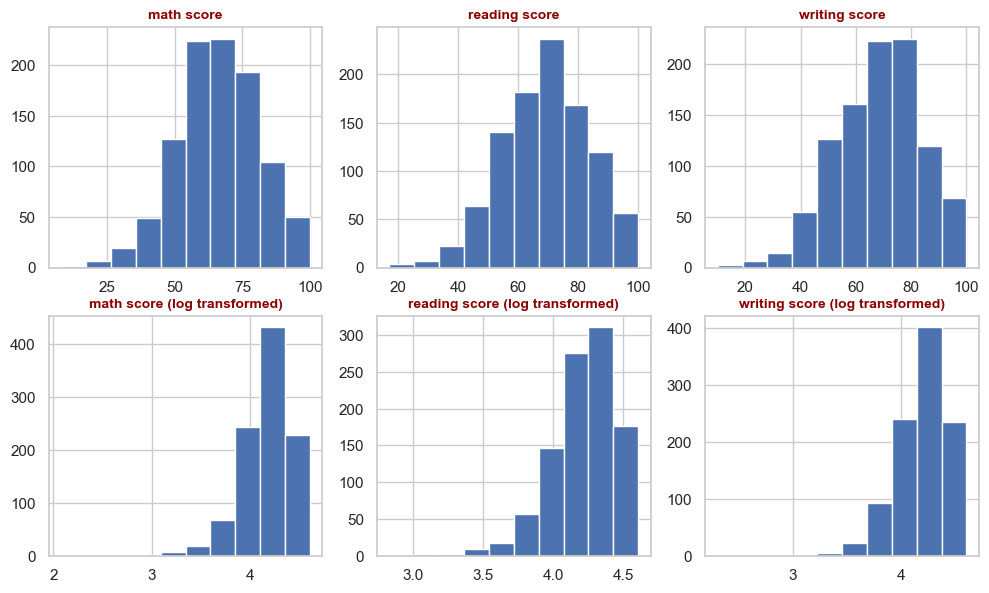

In [5]:
plt.figure(figsize=(12,7))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 10 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

variables = ['math score', 'reading score' , 'writing score']

for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.hist(students[variables[i]])
    plt.title(variables[i], fontdict=title_font)
    
for i in range(3):
    plt.subplot(2, 3, i+4)
    plt.hist((np.log(students[variables[i]])))
    plt.title(variables[i] + ' (log transformed)', fontdict=title_font)

In [6]:
students.dropna(inplace=True)

In [7]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

variables = ['math score', 'reading score' , 'writing score']
distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for variable in variables:
    jb_stats = jarque_bera(np.log(students[variable]))
    norm_stats = normaltest(np.log(students[variable]))
    distribution_tests = distribution_tests.append({"variable": variable,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math score,2715.06497,0.00000,399.66444,0.00000
1,reading score,495.12732,0.00000,209.77151,0.00000
2,writing score,1410.93701,0.00000,318.96921,0.00000


In [8]:
# Both Jarque-Bera and Normal Test reveal that p-values are all 0 indicating that at 5% confidence interval,
# we fail to accept the null hypothesis of data has normally distributed. So, none of the variables of interest are normally distributed.
# we can do normalisation process. 

In [9]:
# 2nd Part

In [10]:
students["score_average"]=students.mean(axis=1)

In [11]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

jb_stats = jarque_bera(np.log(students["score_average"]))
norm_stats = normaltest(np.log(students["score_average"]))
distribution_tests = distribution_tests.append({"variable": "score_average",
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,score_average,1098.42922,0.00000,289.47668,0.00000


In [12]:
# we assess that the distribution is not normal considering both tests

In [13]:
from sklearn.preprocessing import normalize

students["norm_score_average"]= normalize(np.array(students["score_average"]).reshape(1,-1)).reshape(-1,1)
normal_features=["score_average","norm_score_average"]


print('Minimum Value\n-----------------',)
print(students[normal_features].min())
print('\nMaximum Value\n-----------------',)
print(students[normal_features].max())

Minimum Value
-----------------
score_average        12.33333
norm_score_average    0.00563
dtype: float64

Maximum Value
-----------------
score_average        100.00000
norm_score_average     0.04566
dtype: float64


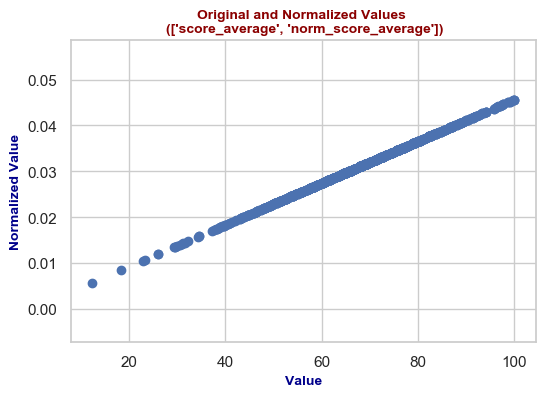

In [14]:
plt.figure(figsize=(6,4))

plt.scatter(students[normal_features[0]], students[normal_features[1]])
plt.title("Original and Normalized Values \n ({})".format(normal_features), fontdict=title_font)
plt.xlabel("Value", fontdict=axis_font)
plt.ylabel("Normalized Value", fontdict=axis_font)

plt.show()

In [15]:
# 3rd Part

In [18]:
students.groupby("gender")["score_average"].mean().T
# It can clearly be observed male students are more successfull in math, nevertheless female ones are successfull in reading and writing.

gender
female   69.57593
male     65.83748
Name: score_average, dtype: float64

In [20]:
students.groupby("race/ethnicity")["score_average"].mean().T
# there is a gradually increase related to the origins.

race/ethnicity
group A   62.99251
group B   65.46842
group C   67.14211
group D   69.17939
group E   72.75238
Name: score_average, dtype: float64

In [24]:
students.groupby("parental level of education")["score_average"].mean().T
# Again there is a gradually increase related to education level of parents.

parental level of education
associate's degree   69.56907
bachelor's degree    71.92373
high school          63.09694
master's degree      73.59887
some college         68.47640
some high school     65.12663
Name: score_average, dtype: float64

In [25]:
students.groupby("lunch")["score_average"].mean().T
# Lunch type has a great effect on the scores where standard lunch effects positively

lunch
free/reduced   62.20845
standard       70.83721
Name: score_average, dtype: float64

In [ ]:
# 4th Part

In [27]:
students.groupby("test preparation course")["score_average"].mean().T
# the preparation courses have a big impact on exam performance

test preparation course
completed   72.66946
none        65.04413
Name: score_average, dtype: float64